/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Mean photon number: 0.9438202247191012
Photon state probabilities: [0.3820224719101127, 0.37078651685393266, 0.17977528089887634, 0.05617977528089889, 0.011235955056179777]


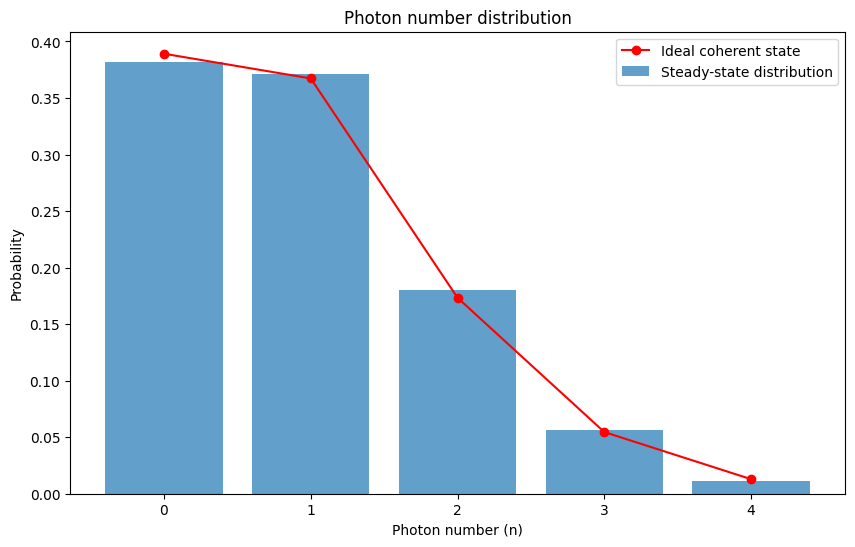

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import factorial

# Parameters
N = 5  # Truncated photon Hilbert space
Delta_c = 0.0  # Detuning of the cavity (omega_c - omega)
Delta_a = 0.0  # Detuning of the atom (omega_a - omega)
g = 0.0  # Coupling strength

E = 0.05  # Driving amplitude
kappa = 0.1  # Cavity decay rate
gamma = 0.05  # Atomic decay rate


# Operators
a = destroy(N)  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_minus = sigmam()  # Atomic lowering operator
sigma_plus = sigmap()  # Atomic raising operator

# Tensor operators
a_full = tensor(qeye(2), a)  # Cavity operator in full space
adag_full = tensor(qeye(2), adag)
sigma_minus_full = tensor(sigma_minus, qeye(N))  # Atomic operator in full space
sigma_plus_full = tensor(sigma_plus, qeye(N))

# Hamiltonian in RWA
H = Delta_c * (adag_full * a_full) + Delta_a * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

# Collapse operators
collapse_ops = [
    np.sqrt(kappa) * a_full,  # Cavity decay
    np.sqrt(gamma) * sigma_minus_full  # Atomic decay
]

# Initial state: atom in ground state, cavity in vacuum
psi0 = tensor(basis(2, 0), basis(N, 0))

# Solve the master equation
dt=0.1
times = np.arange(0, 500, dt)  # Time range
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])

# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Coherent state distribution (for comparison)
coherent_amplitude = np.sqrt(mean_photon_number)
ideal_distribution = [np.abs(poisson.pmf(n, coherent_amplitude**2)) for n in range(N)]
#ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / factorial(n) for n in range(N)]

# Plot the photon number distribution
plt.figure(figsize=(10, 6))
plt.bar(range(N), photon_distribution, alpha=0.7, label="Steady-state distribution")
plt.plot(range(N), ideal_distribution, 'o-', c="red", label="Ideal coherent state")
plt.xlabel("Photon number (n)")
plt.ylabel("Probability")
plt.title("Photon number distribution")
plt.legend()
plt.show()

In the presence of a coupling ˜ g, the previous resonance condition is not valid anymore. Set
ω to resonance with the lowest (one-photon) dressed state of the Jaynes-Cummings model
and find again the steady state in the strong-coupling condition ˜ g ≫Γ,κ and weak drive
E. How important is the value of the pumping strength E? (Be careful that increasing E
too much could lead to instability/bistability)

In [2]:
# New parameters
g = 2.5  # Coupling strength
omega_c = 1.2  # Cavity freq
omega_a = 0.6  # Atom freq 

delta = omega_a - omega_c
omega_drive = omega_c - (delta/2 - np.sqrt(g**2 + (delta/2)**2))
# omega_drive = omega_c - g # Drive freq

E = 0.01 # Driving amplitude
kappa = 0.001  # Cavity decay rate
gamma = 0.0005  # Atomic decay rate


# Full Hamiltonian
def H(Delta_c, Delta_a, g, E):
     
    Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

    return Hamiltonian

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


Mean photon number: 0.00010171040400368705
Photon state probabilities: [0.9998982921721575, 0.00010170525171411361, 2.576095829696657e-09, 3.2637663718171867e-14, 2.6336855610107967e-19]


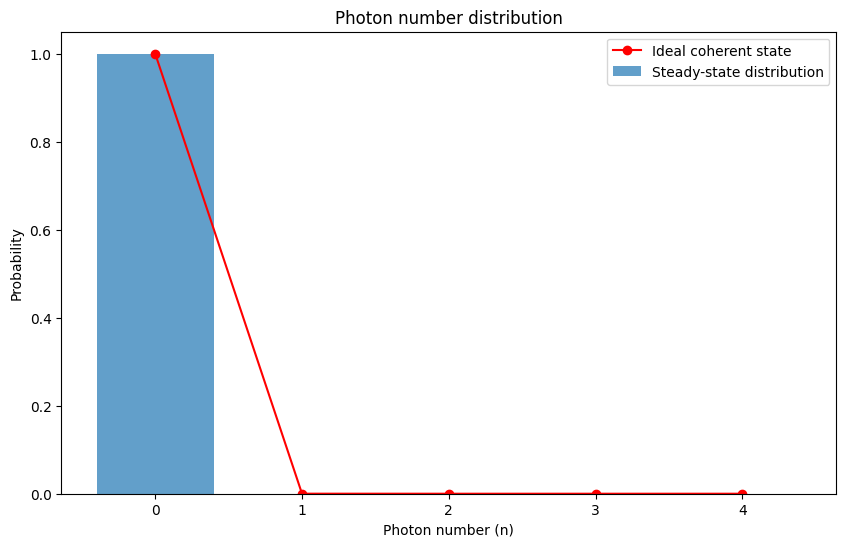

In [3]:
# Set omega to resonance with the lowest dressed state
Delta_c = omega_c - omega_drive
Delta_a = omega_a - omega_drive

# Define the new Hamiltonian
H = H(Delta_c, Delta_a, g, E)

# Solve the corresponding master equation
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])
# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Coherent state distribution (for comparison)
coherent_amplitude = np.sqrt(mean_photon_number)
ideal_distribution = [np.abs(poisson.pmf(n, coherent_amplitude**2)) for n in range(N)]
#ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / factorial(n) for n in range(N)]

# Plot the photon number distribution
plt.figure(figsize=(10, 6))
plt.bar(range(N), photon_distribution, alpha=0.7, label="Steady-state distribution")
plt.plot(range(N), ideal_distribution, 'o-', c="red", label="Ideal coherent state")
plt.xlabel("Photon number (n)")
plt.ylabel("Probability")
plt.title("Photon number distribution")
plt.legend()
plt.show()

In [4]:
E = np.array([e for e in np.arange(0, 20, 0.5)])

photon_numbers = np.array([])

for e in E:

    Ham = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + e * (a_full + adag_full)

    # Steady state
    rho_ss = steadystate(Ham, collapse_ops)

    # Mean photon number
    mean_photon_number = expect(adag_full * a_full, rho_ss)

    photon_numbers = np.append(photon_numbers, mean_photon_number)

[3.16296076e-16 1.85223010e-01 4.82582862e-01 8.07739640e-01
 1.11941438e+00 1.35504526e+00 1.52411338e+00 1.63901223e+00
 1.71482892e+00 1.76662034e+00 1.82024960e+00 1.85971701e+00
 1.89280203e+00 1.92138443e+00 1.94534104e+00 1.96434730e+00
 1.97856154e+00 1.98865797e+00 1.99554533e+00 2.00009889e+00
 2.00302916e+00 2.00486002e+00 2.00595738e+00 2.00656952e+00
 2.00686253e+00 2.00694698e+00 2.00689645e+00 2.00676000e+00
 2.00657045e+00 2.00634978e+00 2.00611272e+00 2.00586909e+00
 2.00562543e+00 2.00538599e+00 2.00515349e+00 2.00492958e+00
 2.00471520e+00 2.00451080e+00 2.00431646e+00 2.00413206e+00]


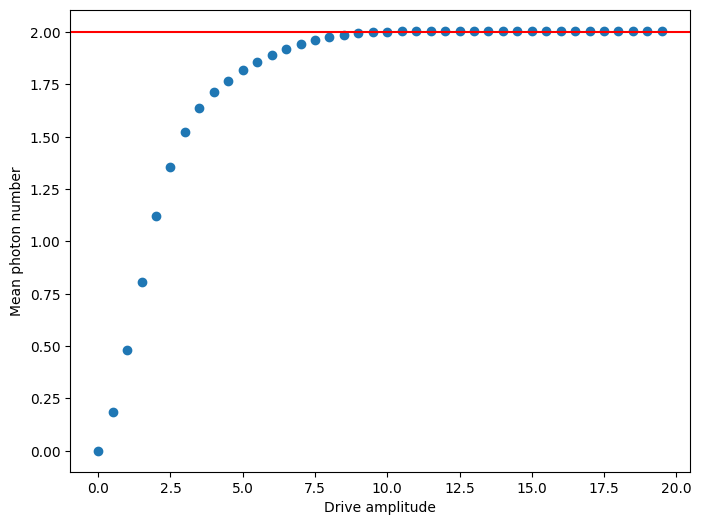

In [5]:
print(photon_numbers)

plt.figure(figsize=(8, 6))
plt.axhline(2, c="red")
plt.scatter(E, photon_numbers)
plt.xlabel("Drive amplitude")
plt.ylabel("Mean photon number")
plt.show()